# Load DataSet

In [ ]:
import pandas as pd
file_path = "/content/online_retail_II.csv"
data = pd.read_csv(file_path)

# Data Exploration

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [ ]:
# Display the first few rows

print(data.head())


  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

           InvoiceDate  Price  Customer ID         Country  
0  2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3  2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4  2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


In [ ]:
# Summary Statistics

print(data.describe())


           Quantity         Price   Customer ID
count  94474.000000  94474.000000  68437.000000
mean      11.005589      4.597881  15347.030408
std      115.968893     50.234910   1674.961690
min    -3669.000000      0.000000  12346.000000
25%        1.000000      1.250000  14030.000000
50%        3.000000      2.550000  15293.000000
75%        8.000000      4.300000  16797.000000
max    19152.000000   8985.600000  18287.000000


In [ ]:
data.isna().sum()

Invoice            0
StockCode          0
Description      831
Quantity           0
InvoiceDate        0
Price              0
Customer ID    26037
Country            0
dtype: int64

In [ ]:
# Data types and missing values

print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94474 entries, 0 to 94473
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Invoice      94474 non-null  object 
 1   StockCode    94474 non-null  object 
 2   Description  93643 non-null  object 
 3   Quantity     94474 non-null  int64  
 4   InvoiceDate  94474 non-null  object 
 5   Price        94474 non-null  float64
 6   Customer ID  68437 non-null  float64
 7   Country      94474 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 5.8+ MB
None


In [ ]:
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

quantity_outliers = find_outliers_iqr(data, 'Quantity')
price_outliers = find_outliers_iqr(data, 'Price')

print(f'Number of outliers in Quantity: {len(quantity_outliers)}')
print(f'Number of outliers in Price: {len(price_outliers)}')


Number of outliers in Quantity: 10433
Number of outliers in Price: 6468


# DATA CLEANING

# Handling Missing Values

In [ ]:
data.isna().sum() / data.shape[0]

Invoice        0.000000
StockCode      0.000000
Description    0.008796
Quantity       0.000000
InvoiceDate    0.000000
Price          0.000000
Customer ID    0.275600
Country        0.000000
dtype: float64

In [ ]:
data.dropna(inplace = True)
data.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

# Handling Duplicates

In [ ]:
data.drop_duplicates(inplace = True)

In [ ]:
data.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

# DATA ANALYSIS

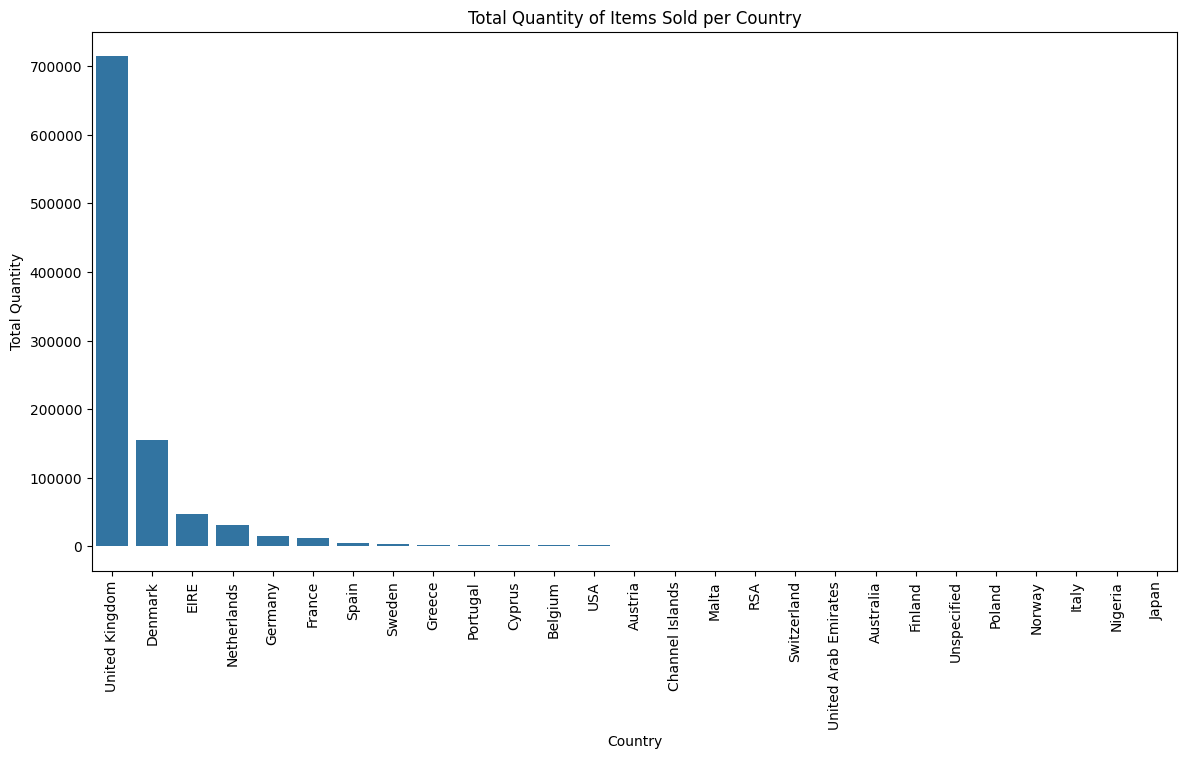

In [ ]:
# 1 What is the total quantity of items sold per country?

import matplotlib.pyplot as plt
import seaborn as sns

# Total Quantity Sold per Country
quantity_per_country = data.groupby('Country')['Quantity'].sum().sort_values(ascending=False)

# Bar Plot
plt.figure(figsize=(14, 7))
sns.barplot(x=quantity_per_country.index, y=quantity_per_country.values)
plt.title('Total Quantity of Items Sold per Country')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.ylabel('Total Quantity')
plt.show()


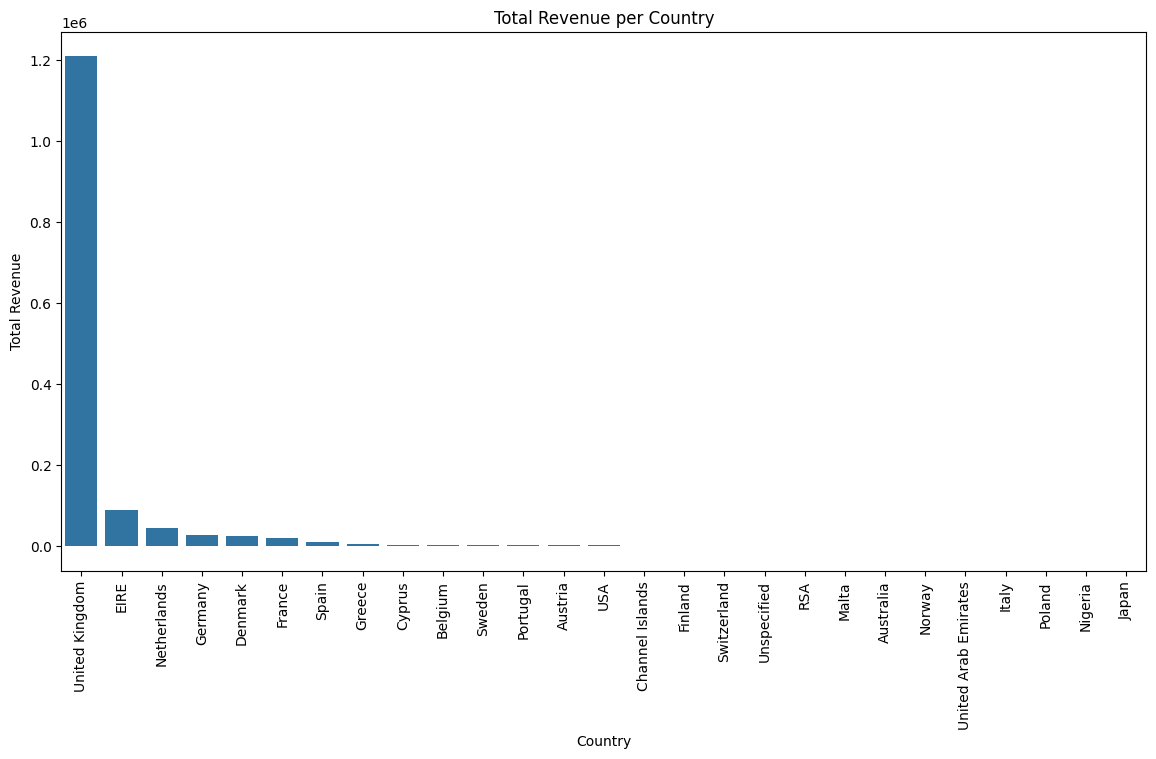

In [ ]:
# 2. What is the total revenue generated per country?

# Total Revenue per Country
data['TotalRevenue'] = data['Quantity'] * data['Price']
revenue_per_country = data.groupby('Country')['TotalRevenue'].sum().sort_values(ascending=False)

# Bar Plot
plt.figure(figsize=(14, 7))
sns.barplot(x=revenue_per_country.index, y=revenue_per_country.values)
plt.title('Total Revenue per Country')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)
plt.show()

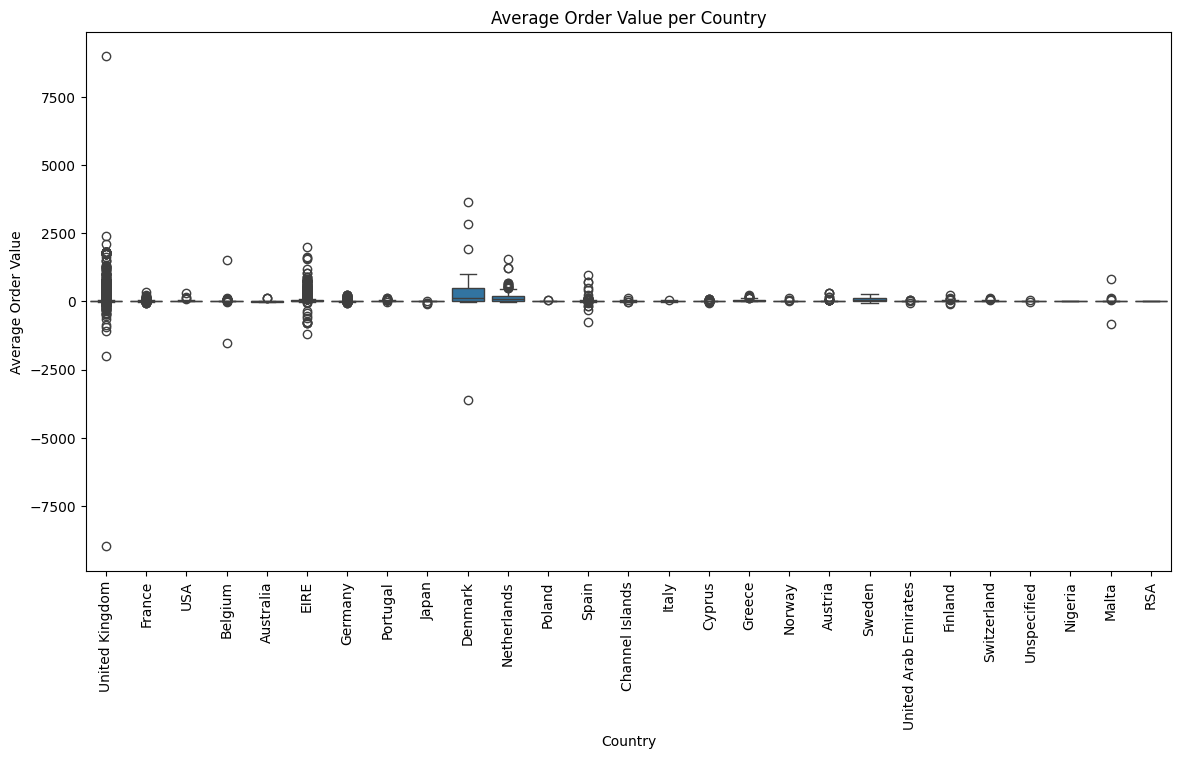

In [ ]:
# 3. What is the average order value per country?

# Average Order Value per Country
average_order_value_per_country = data.groupby('Country')['TotalRevenue'].mean().sort_values(ascending=False)

# Box Plot
plt.figure(figsize=(14, 7))
sns.boxplot(x='Country', y='TotalRevenue', data=data)
plt.title('Average Order Value per Country')
plt.xlabel('Country')
plt.ylabel('Average Order Value')
plt.xticks(rotation=90)
plt.show()

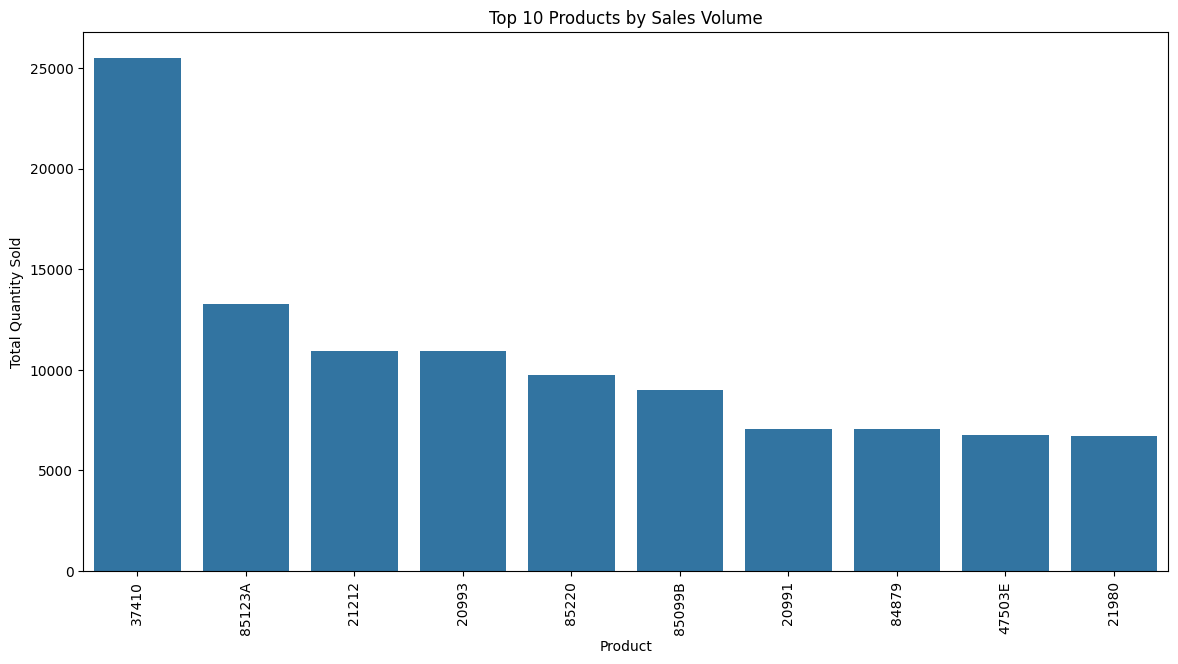

In [ ]:
# 4. What are the top 10 products by sales volume?

# Top 10 Products by Sales Volume
top_products_by_volume = data.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)

# Bar Plot
plt.figure(figsize=(14, 7))
sns.barplot(x=top_products_by_volume.index, y=top_products_by_volume.values)
plt.title('Top 10 Products by Sales Volume')
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=90)
plt.show()

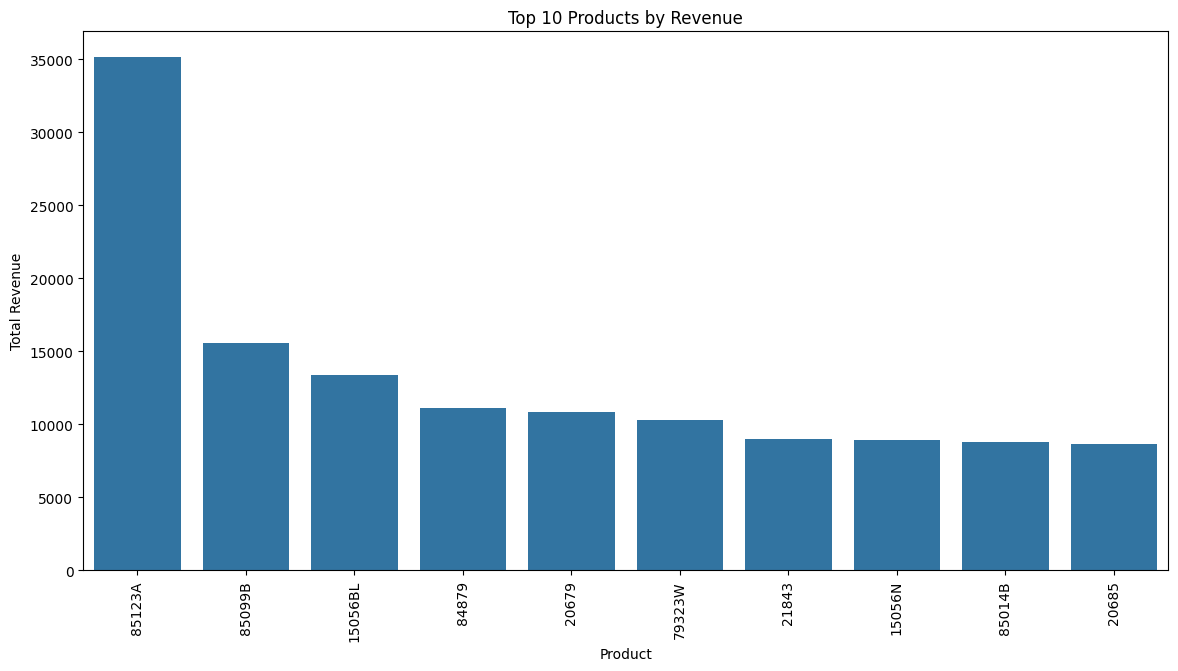

In [ ]:
# 5 What are the top 10 products by revenue?

# Top 10 Products by Revenue
top_products_by_revenue = data.groupby('StockCode')['TotalRevenue'].sum().sort_values(ascending=False).head(10)

# Bar Plot
plt.figure(figsize=(14, 7))
sns.barplot(x=top_products_by_revenue.index, y=top_products_by_revenue.values)
plt.title('Top 10 Products by Revenue')
plt.xlabel('Product')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)
plt.show()

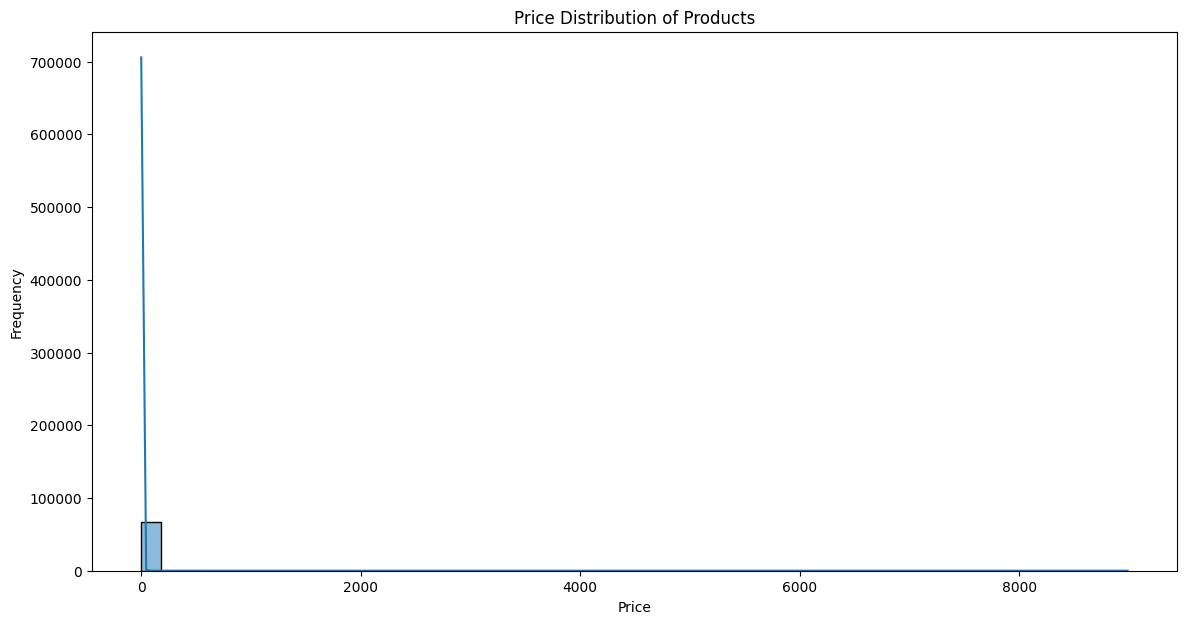

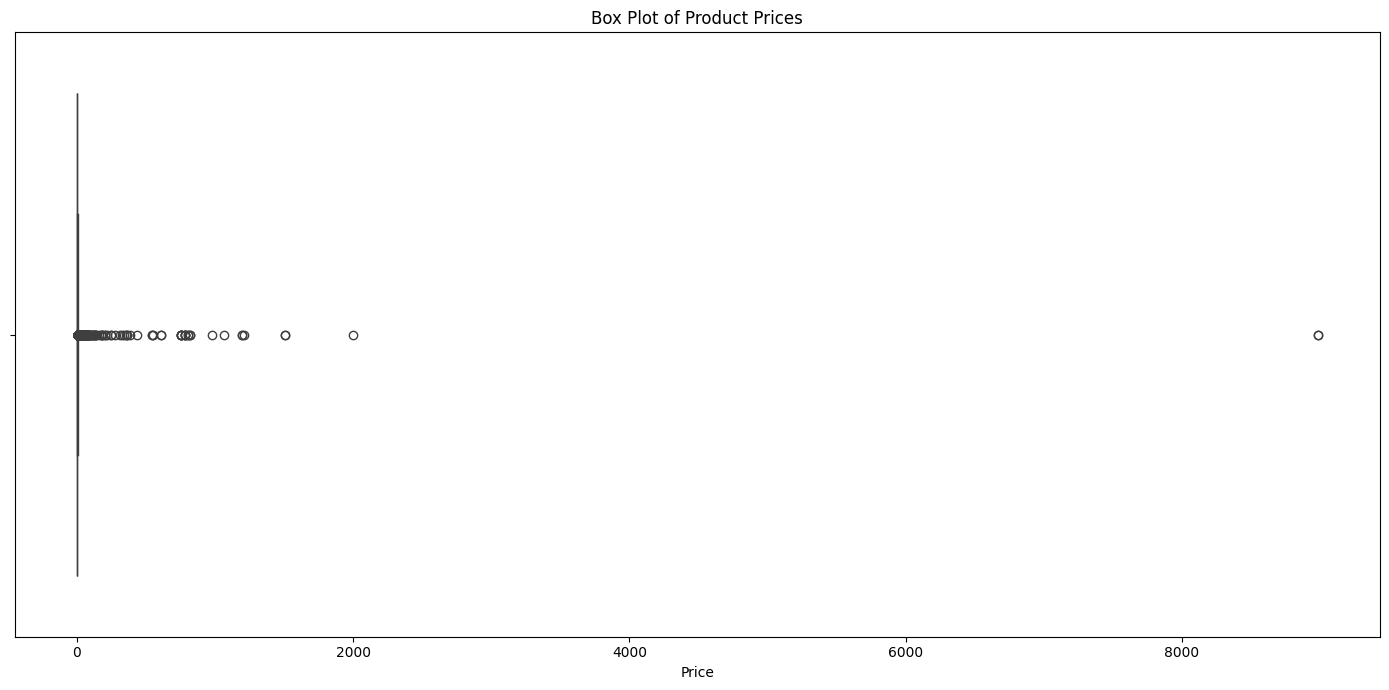

In [ ]:
# 6 What is the price distribution of products?

# Price Distribution of Products
plt.figure(figsize=(14, 7))
sns.histplot(data['Price'], kde=True, bins=50)
plt.title('Price Distribution of Products')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Box Plot
plt.figure(figsize=(14, 7))
sns.boxplot(x=data['Price'])
plt.title('Box Plot of Product Prices')
plt.xlabel('Price')

plt.tight_layout()
plt.show()

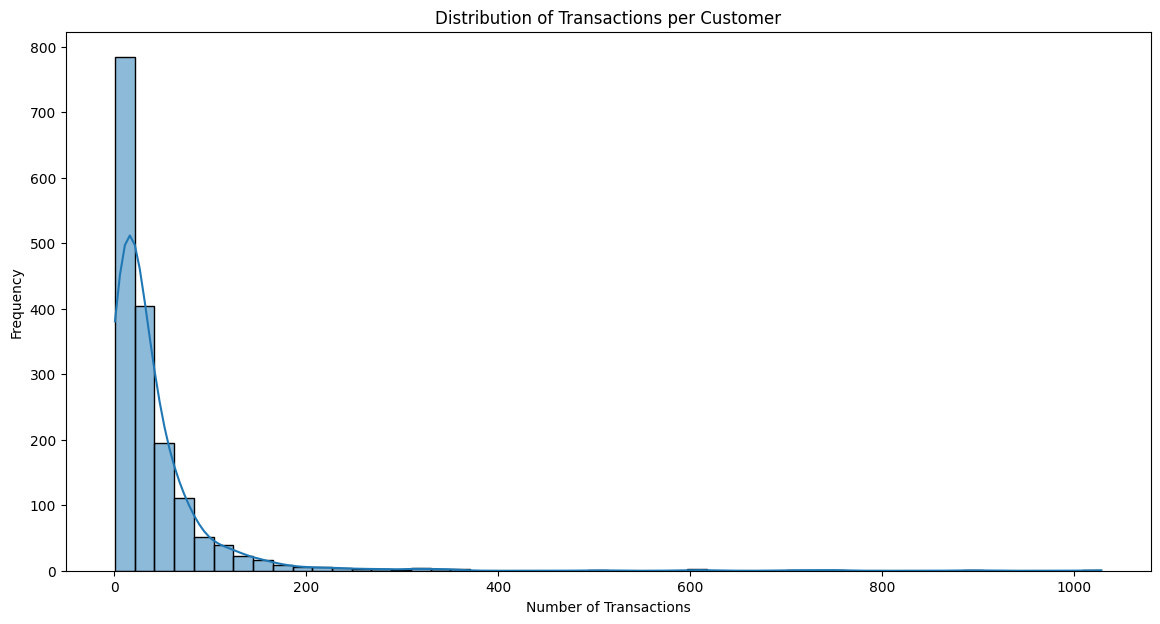

In [ ]:
#7. Distribution of Transactions per Customer

transactions_per_customer = data['Customer ID'].value_counts()
plt.figure(figsize=(14, 7))
sns.histplot(transactions_per_customer, kde=True, bins=50)
plt.title('Distribution of Transactions per Customer')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')
plt.show()

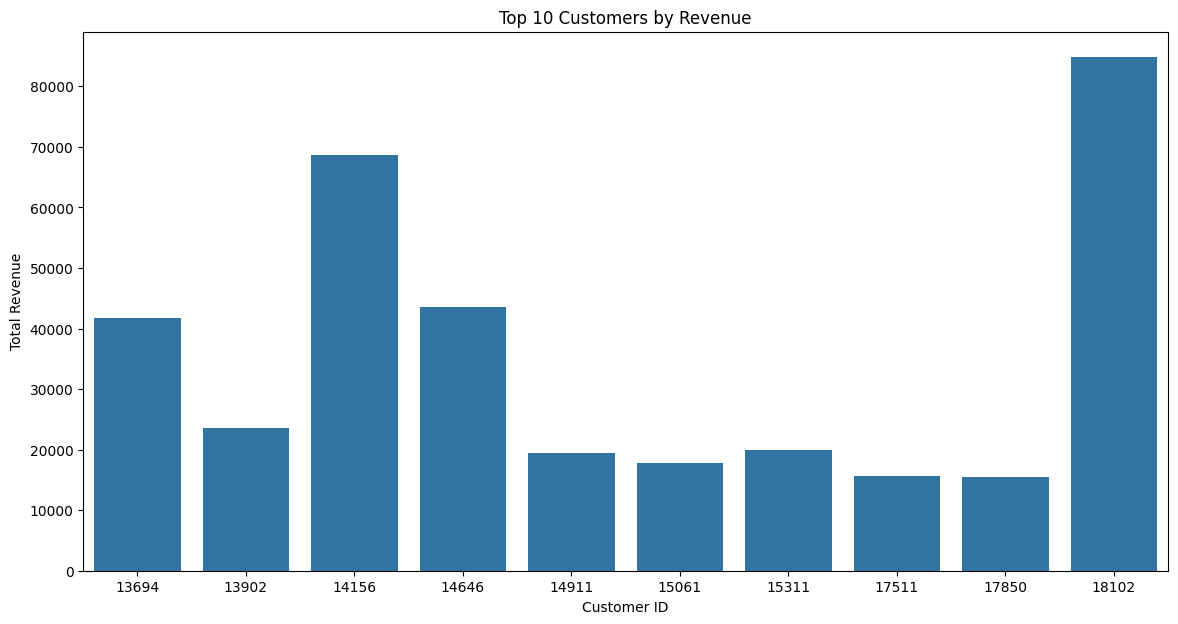

In [ ]:
#8. Top 10 Customers by Total Revenue

top_customers_by_revenue = data.groupby('Customer ID')['TotalRevenue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(14, 7))
sns.barplot(x=top_customers_by_revenue.index.astype(int), y=top_customers_by_revenue.values)
plt.title('Top 10 Customers by Revenue')
plt.xlabel('Customer ID')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.show()

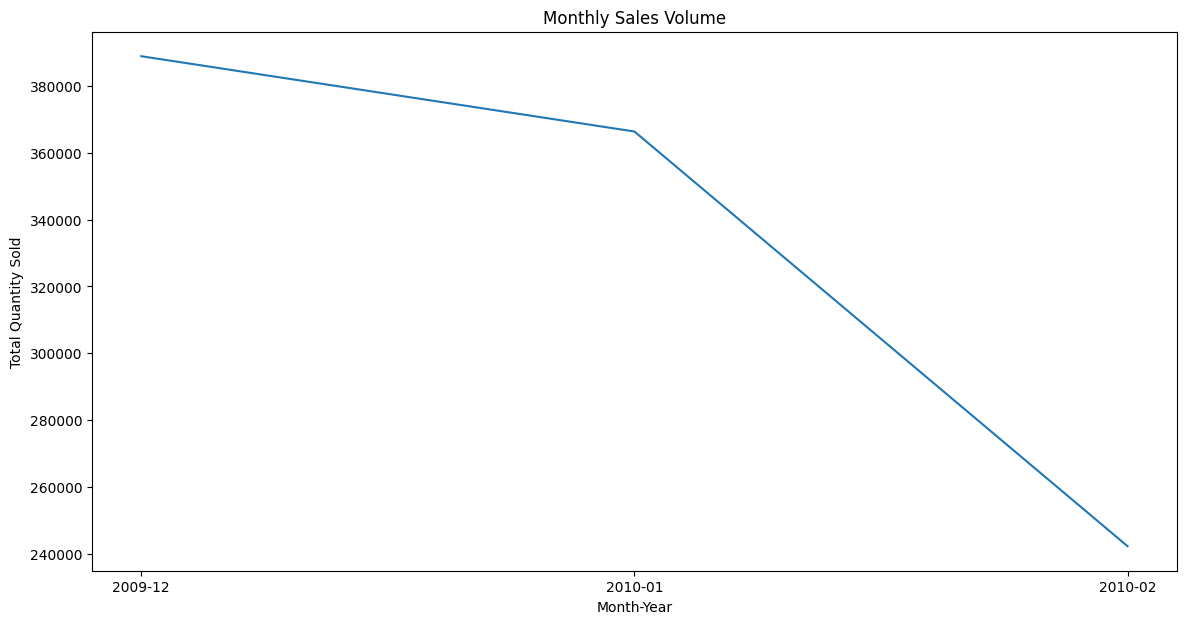

In [ ]:
# 9 Monthly Sales Volumes

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['YearMonth'] = data['InvoiceDate'].dt.to_period('M')
monthly_sales_volume = data.groupby('YearMonth')['Quantity'].sum()
plt.figure(figsize=(14, 7))
sns.lineplot(x=monthly_sales_volume.index.astype(str), y=monthly_sales_volume.values)
plt.title('Monthly Sales Volume')
plt.xlabel('Month-Year')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=0)
plt.show()

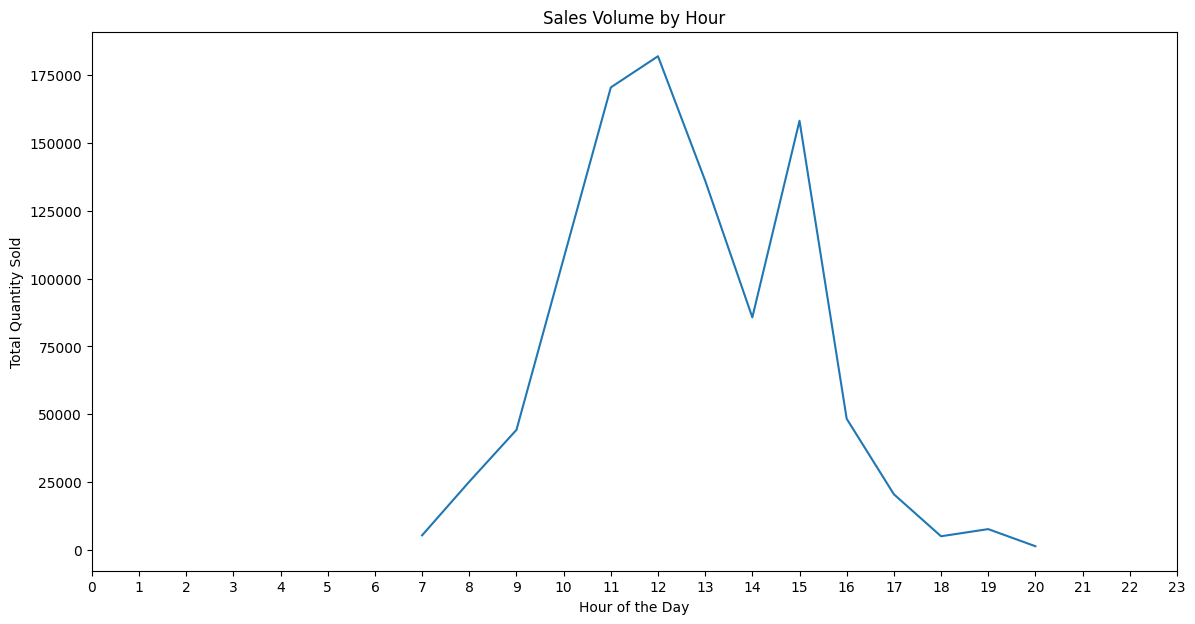

In [ ]:
# 10 Peak Hours for Sales

data['Hour'] = data['InvoiceDate'].dt.hour
hourly_sales = data.groupby('Hour')['Quantity'].sum()
plt.figure(figsize=(14, 7))
sns.lineplot(x=hourly_sales.index, y=hourly_sales.values)
plt.title('Sales Volume by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Quantity Sold')
plt.xticks(range(0, 24))
plt.show()

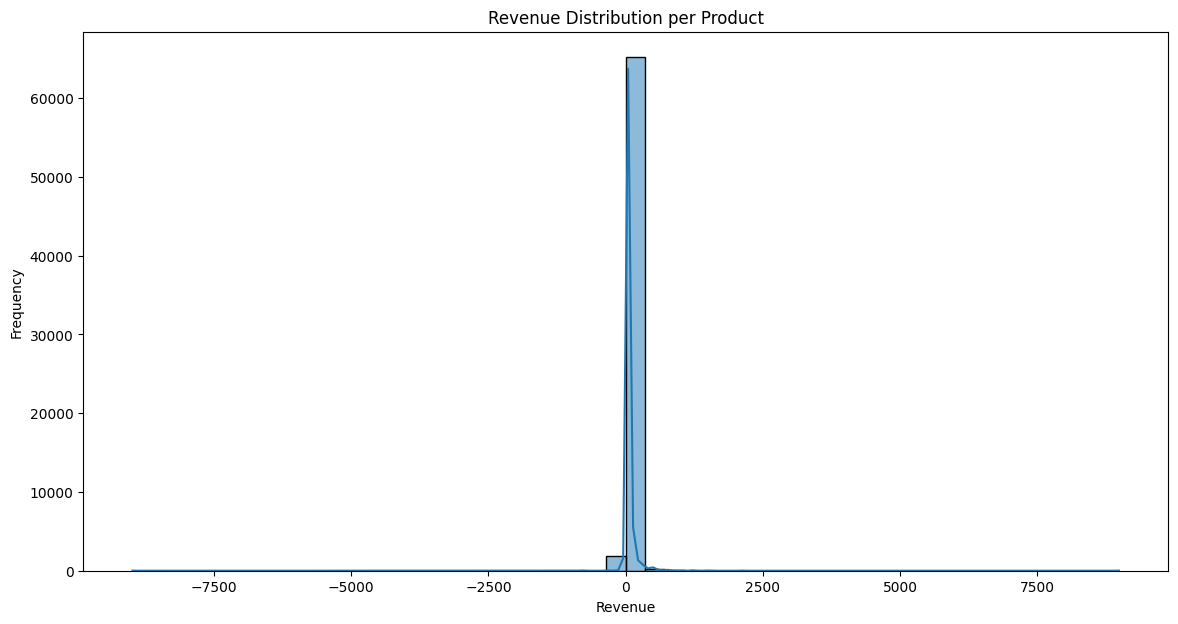

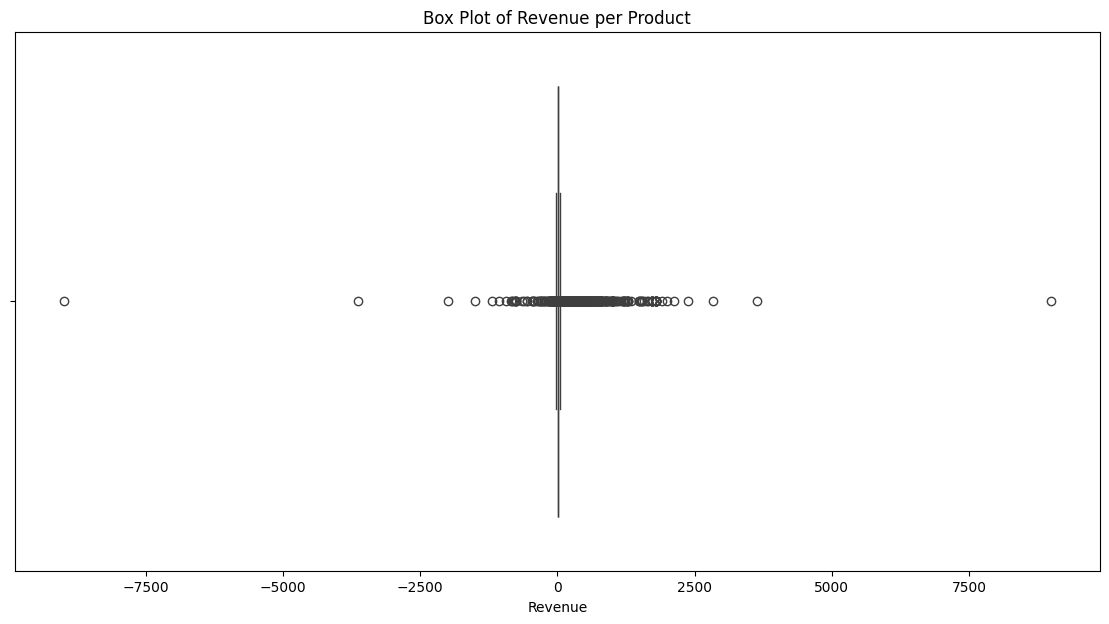

In [ ]:
# 11 Revenue Distribution per Product

plt.figure(figsize=(14, 7))
sns.histplot(data['TotalRevenue'], kde=True, bins=50)
plt.title('Revenue Distribution per Product')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(14, 7))
sns.boxplot(x=data['TotalRevenue'])
plt.title('Box Plot of Revenue per Product')
plt.xlabel('Revenue')
plt.show()

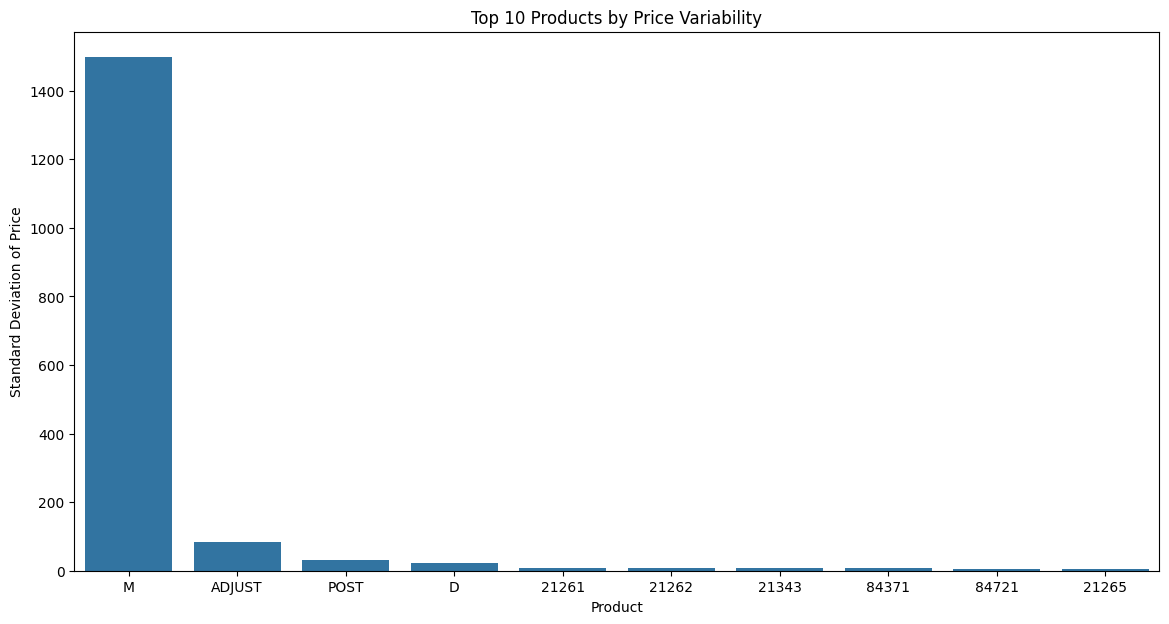

In [ ]:
#12. Products with the Highest Price Variability

price_variability = data.groupby('StockCode')['Price'].std().sort_values(ascending=False).head(10)
plt.figure(figsize=(14, 7))
sns.barplot(x=price_variability.index, y=price_variability.values)
plt.title('Top 10 Products by Price Variability')
plt.xlabel('Product')
plt.ylabel('Standard Deviation of Price')
plt.xticks(rotation=0)
plt.show()

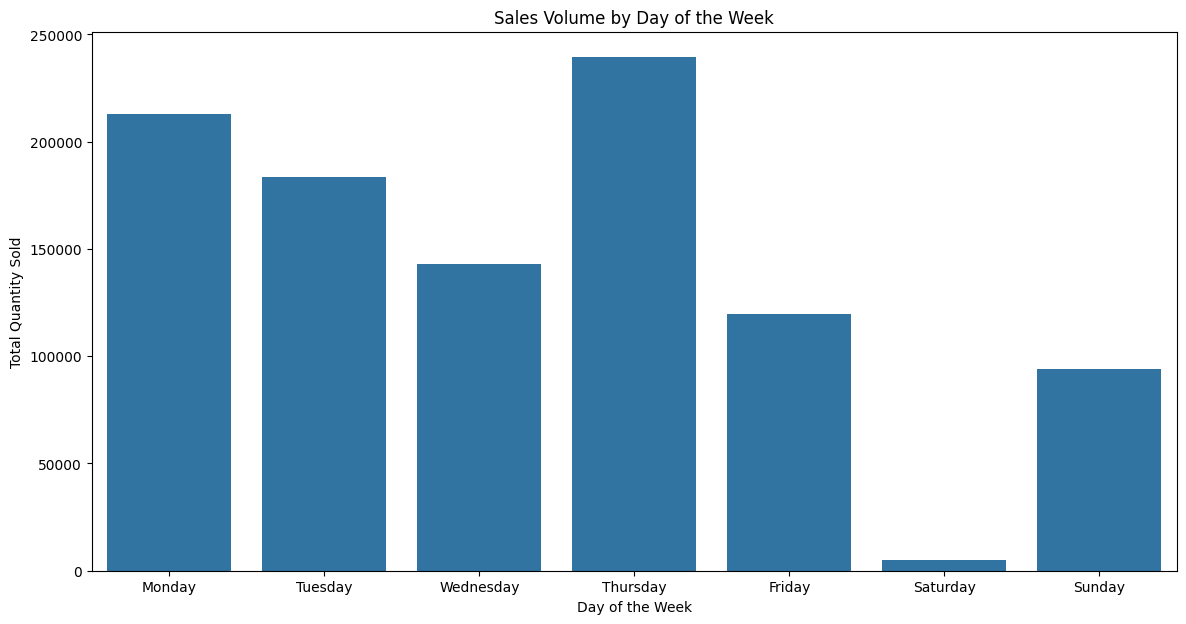

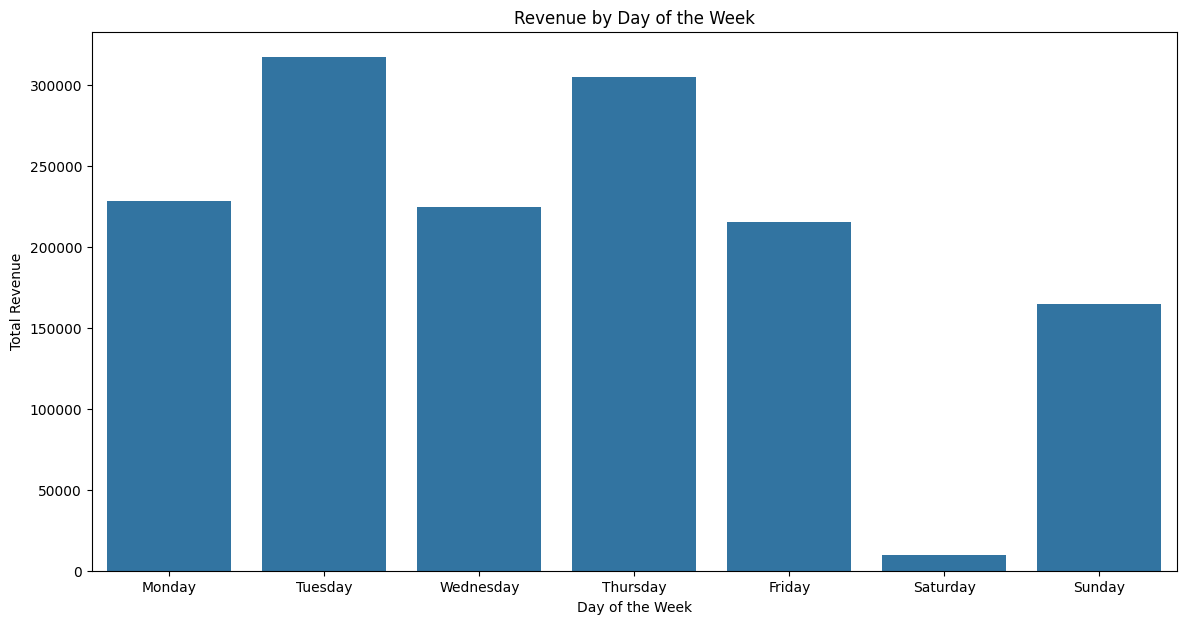

In [ ]:
# 13 Sales and Revenue by Day of the Week

data['DayOfWeek'] = data['InvoiceDate'].dt.day_name()
sales_by_day = data.groupby('DayOfWeek')['Quantity'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
revenue_by_day = data.groupby('DayOfWeek')['TotalRevenue'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(14, 7))
sns.barplot(x=sales_by_day.index, y=sales_by_day.values)
plt.title('Sales Volume by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(x=revenue_by_day.index, y=revenue_by_day.values)
plt.title('Revenue by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.show()

Percentage of Transactions with Missing Customer IDs: 0.00%


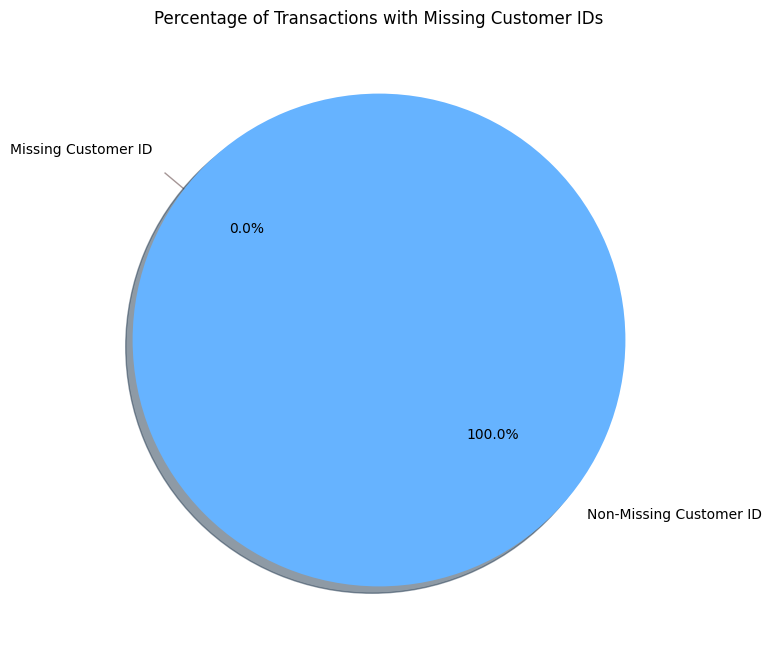

In [ ]:
# 14 Percentage of Transactions with Missing Customer IDs

missing_customer_id_percentage = data['Customer ID'].isnull().mean() * 100
print(f'Percentage of Transactions with Missing Customer IDs: {missing_customer_id_percentage:.2f}%')

labels = ['Missing Customer ID', 'Non-Missing Customer ID']
sizes = [missing_customer_id_percentage, 100 - missing_customer_id_percentage]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of Transactions with Missing Customer IDs')
plt.show()

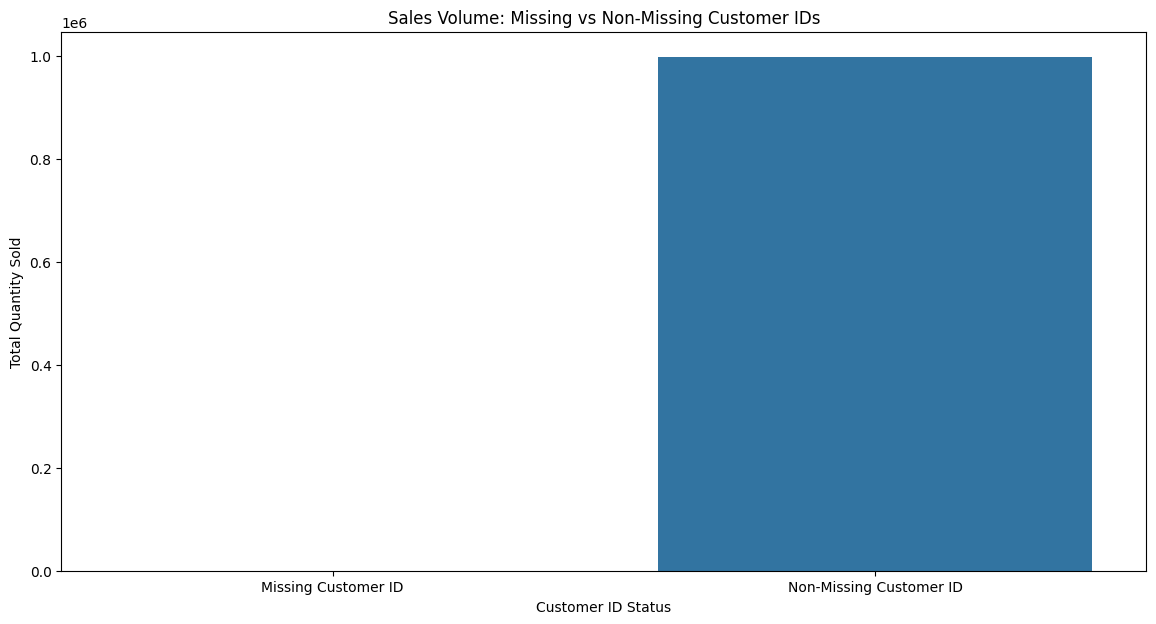

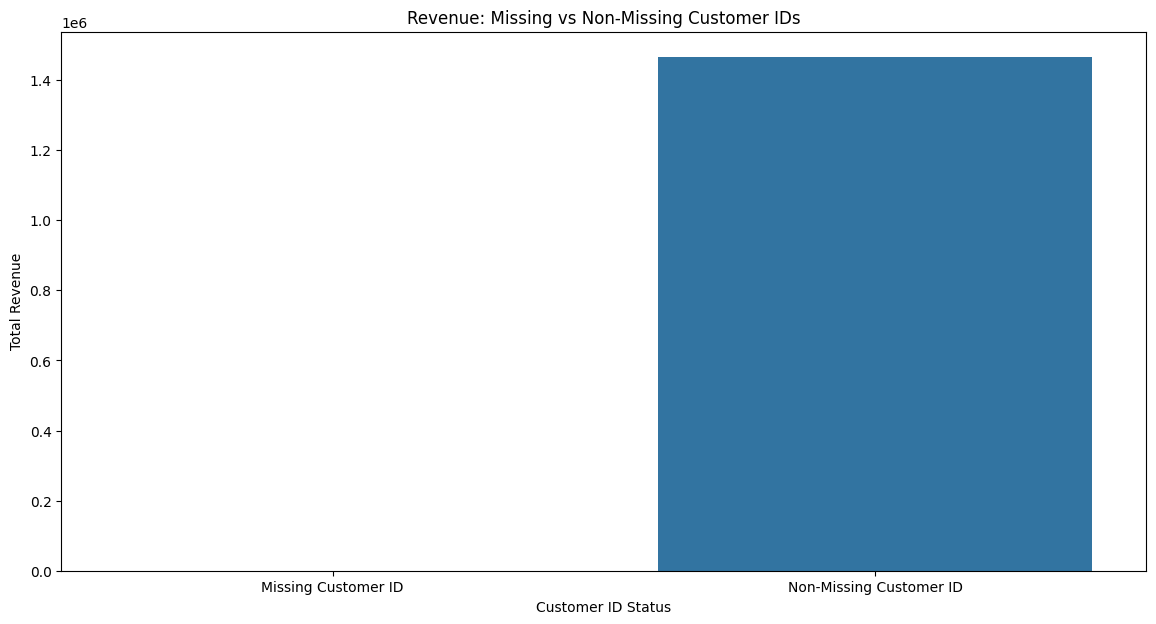

In [ ]:
# 15 Transactions with Missing Customer IDs vs. Non-Missing Customer IDs

sales_missing_customer_id = data[data['Customer ID'].isnull()]['Quantity'].sum()
sales_non_missing_customer_id = data[data['Customer ID'].notnull()]['Quantity'].sum()

revenue_missing_customer_id = data[data['Customer ID'].isnull()]['TotalRevenue'].sum()
revenue_non_missing_customer_id = data[data['Customer ID'].notnull()]['TotalRevenue'].sum()

plt.figure(figsize=(14, 7))
sns.barplot(x=['Missing Customer ID', 'Non-Missing Customer ID'], y=[sales_missing_customer_id, sales_non_missing_customer_id])
plt.title('Sales Volume: Missing vs Non-Missing Customer IDs')
plt.xlabel('Customer ID Status')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(x=['Missing Customer ID', 'Non-Missing Customer ID'], y=[revenue_missing_customer_id, revenue_non_missing_customer_id])
plt.title('Revenue: Missing vs Non-Missing Customer IDs')
plt.xlabel('Customer ID Status')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.show()